In [1]:
import sys
sys.path.insert(0, './src')
from matplotlib import pyplot as plt

from multiply_connected_pipe import Boundary, MultiplyConnectedPipeFromBoundaries

from curve import *
from pipe import *
from pipe.smooth_pipe import SmoothPipe
from utils import *

from matplotlib.path import Path


In [2]:
p1 = pt(-8,-2)
p2 = pt(8,-2)
p3 = pt(8,2)
p4 = pt(-8,2)

pts = [p1, p2, p3, p4]

l1 = Line
l2 = Cap
l3 = Line
l4 = Cap

ls = [l1, l2, l3, l4]

In [3]:
pipe = SmoothPipe(pts, ls)
pipe.build_geometry()
b1 = Boundary(pipe.curves)

In [4]:
c1 = Circle(1, pt(0,0))
c2 = Circle(-.2, pt(-1,-1))
c3 = Circle(-.2, pt(1,1))

# c = [c1,c2,c3]
c = [c1]
[ci.build() for ci in c];

In [5]:
bs = [Boundary([ci]) for ci in c]
bs.append(b1)

In [6]:
the_pipe = MultiplyConnectedPipeFromBoundaries(bs)

In [7]:
the_pipe.build()

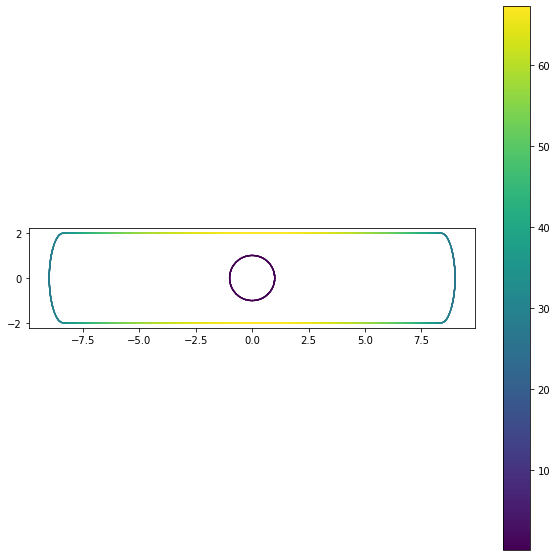

In [8]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0])))
# fig.colorbar(ax.scatter(x, y,s=0.1,c=-u.imag))
ax.set_aspect('equal')
# ax.scatter(xs, ys,s=1,c='r')

Text(0.5, 0.98, 'color=poiseuille boundary value')

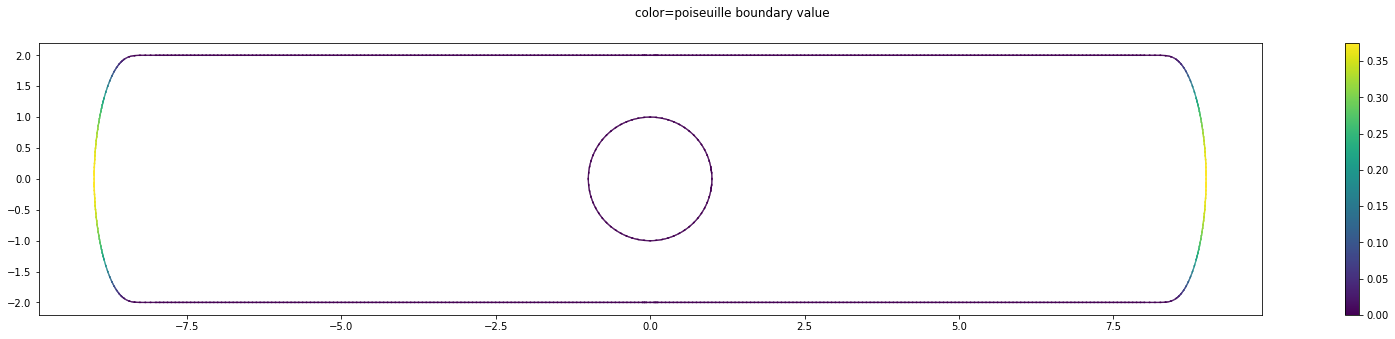

In [9]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(30,5))
fig.colorbar(ax.scatter(x, y,s=0.1,c=-the_pipe.boundary_value(0).imag))
ax.set_aspect('equal')
fig.suptitle('color=poiseuille boundary value')

In [10]:
xs = np.linspace(-8,8,400)
ys = np.linspace(-2,2,100)
xs,ys = np.meshgrid(xs,ys)

xs = xs
ys = ys

In [19]:
m = Path(np.array((the_pipe.exterior_boundary.t.real, the_pipe.exterior_boundary.t.imag)).T).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
for ci in c:
    pts = np.array([ci.t.real,ci.t.imag]).T
    pts = ((pts - ci.aff_trans.b))*1.05 + ci.aff_trans.b
    m &= ~Path(pts).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
m = m.reshape(xs.shape)
m &= (np.abs(xs) < 7.94)
m &= np.abs(ys) < 1.94

In [20]:
U = the_pipe.velocity(xs[m].ravel(),ys[m].ravel(),the_pipe.omegas[0])

In [21]:
p = the_pipe.pressure(xs[m].ravel(),ys[m].ravel(),the_pipe.omegas[0])

In [22]:
u = np.zeros_like(xs)
v = np.zeros_like(xs)
pressure = np.zeros_like(xs)

In [23]:
u[m] = U[:,0]
v[m] = U[:,1]
pressure[m] = p
pressure[~m] = np.nan
u[~m] = np.nan
v[~m] = np.nan

Text(0.5, 0.98, 'color=velocity magnitude, streamlines=direction of flow')

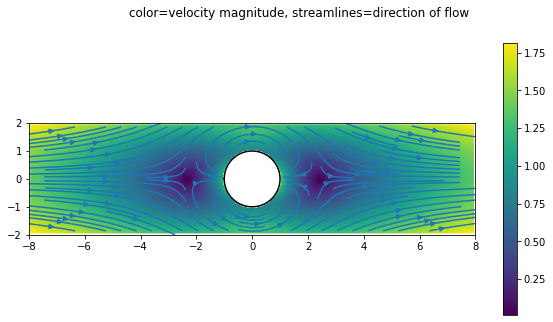

In [24]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')

ax.streamplot(xs,ys,u,v)

fig.colorbar(ax.scatter(xs, ys,s=1,c=np.sqrt(u**2+v**2)))

m1 = (y!= 1) & (y!=-1) & (np.abs(x) >8)

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='black')
fig.suptitle('color=velocity magnitude, streamlines=direction of flow')

In [25]:
x, y = 6, 1.95
the_pipe.velocity(np.array([x]),np.array([y]),the_pipe.omegas[0])

array([[ 1.55942602, -0.32495404]])

Text(0.5, 0.98, 'color=velocity magnitude, streamlines=direction of flow')

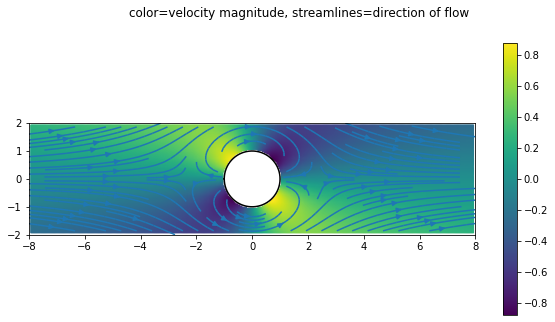

In [26]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
fig.set_facecolor("white")
ax.set_aspect('equal')

ax.streamplot(xs,ys,u,v)

fig.colorbar(ax.scatter(xs, ys,s=1,c=v))

m1 = (y!= 1) & (y!=-1) & (np.abs(x) >8)

for ci in c:
    ax.plot(ci.t.real,ci.t.imag,c='black')
fig.suptitle('color=velocity magnitude, streamlines=direction of flow')
